In [1]:
from lib.utils import *
from lib.models import *
from lib.ekyn import *
from lib.env import *
from lib.datasets import *

In [27]:
X,y = load_eeg_label_pair()

In [29]:
y = y.argmax(axis=1)

In [33]:
y[:30]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

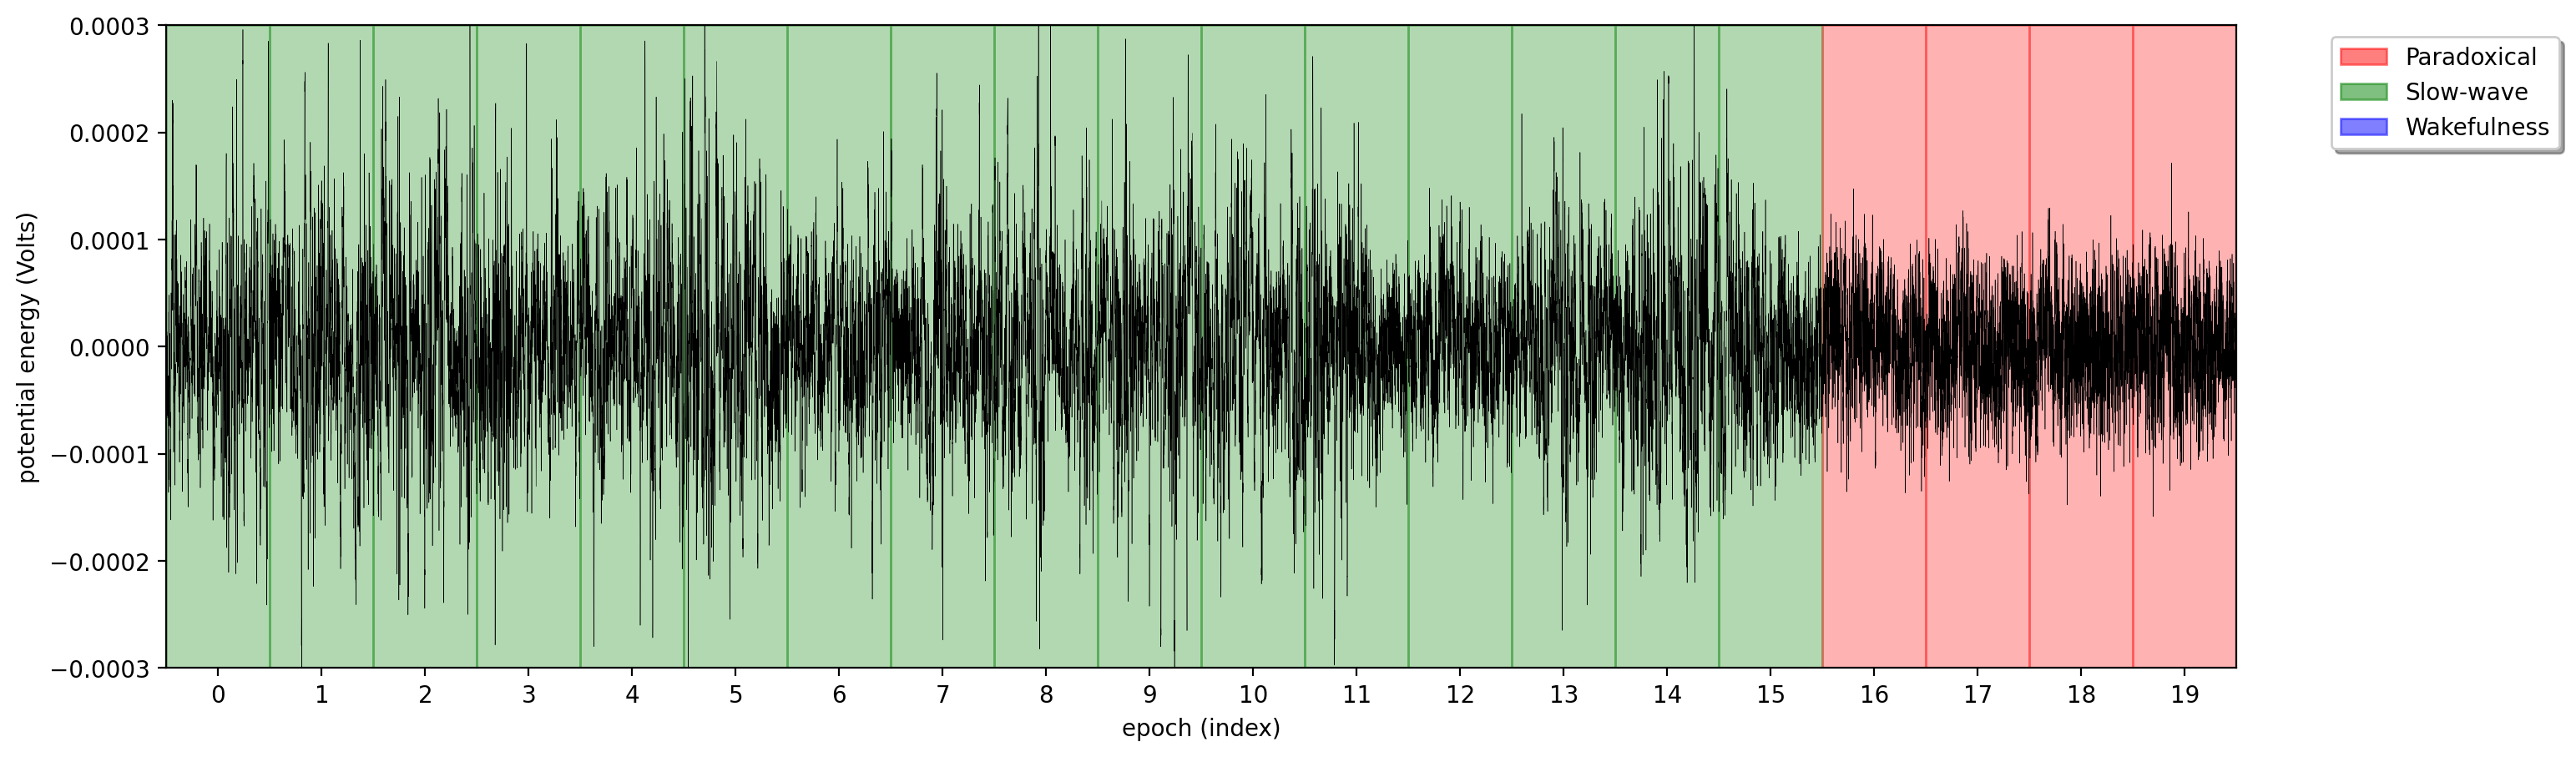

In [84]:
fig, ax = plt.subplots(figsize=(16,5),dpi=200)
import matplotlib.patches as patches

start_epoch = 900
length = 20
plt.plot(X[start_epoch:start_epoch+length].flatten(),'black',linewidth=.2)

colors = ['red','green','blue']
epochs = []
for i in range(length):
    stage = int(y[start_epoch+i])
    ax.fill_between([i*5000, (i+1)*5000], y1=-.0003, y2=.0003, color=colors[stage], alpha=0.3)
    epochs.append(i*5000+2500)

# 4. Add a legend for the background colors using proxy artists
red_patch = patches.Patch(color='red', alpha=0.5, label='Paradoxical')
green_patch = patches.Patch(color='green', alpha=0.5, label='Slow-wave')
blue_patch = patches.Patch(color='blue', alpha=0.5, label='Wakefulness')
plt.ylim([-.0003,.0003])
plt.margins(0,0)
# ax.legend(handles=[red_patch, green_patch,blue_patch],loc='center left', bbox_to_anchor=(1, 0.5))
# Put a legend below current axis
ax.legend(handles=[red_patch, green_patch,blue_patch],loc='upper left', bbox_to_anchor=(1.04, 1),
          fancybox=True, shadow=True, ncol=1)
plt.xlabel('epoch (index)')
plt.ylabel('potential energy (Volts)')
plt.xticks(epochs,range(20));